In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
data = pd.read_csv("prediction.csv")

In [3]:
data

,no,count
0,0,350
1,1,293
2,2,335
3,3,342
4,4,312
5,5,305
6,6,304
7,7,284
8,8,308
9,9,312


In [4]:
x = data["no"].values.reshape(-1,1)

In [5]:
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59]], dtype=int64)

In [6]:
y = data["count"].values.reshape(-1,1)

In [7]:
y

array([[350],
       [293],
       [335],
       [342],
       [312],
       [305],
       [304],
       [284],
       [308],
       [312],
       [305],
       [304],
       [292],
       [308],
       [345],
       [305],
       [290],
       [315],
       [398],
       [312],
       [310],
       [341],
       [320],
       [299],
       [312],
       [305],
       [342],
       [320],
       [308],
       [312],
       [305],
       [304],
       [287],
       [308],
       [293],
       [335],
       [401],
       [312],
       [293],
       [335],
       [342],
       [312],
       [376],
       [305],
       [398],
       [320],
       [367],
       [312],
       [375],
       [304],
       [359],
       [308],
       [382],
       [335],
       [342],
       [312],
       [293],
       [335],
       [368],
       [321]], dtype=int64)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#To retrieve the intercept:
print(regressor.intercept_)

[308.83354532]


In [11]:
#For retrieving the slope:
print(regressor.coef_)

[[0.49825803]]


In [12]:
y_pred = regressor.predict(x_test)

In [13]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,342,321.788254
1,335,326.272576
2,321,338.230769
3,308,322.784770
4,304,314.314384
5,335,309.830061
6,293,325.774318
7,368,337.732511
8,342,328.763867
9,320,319.795222


NameError: name 'plt' is not defined

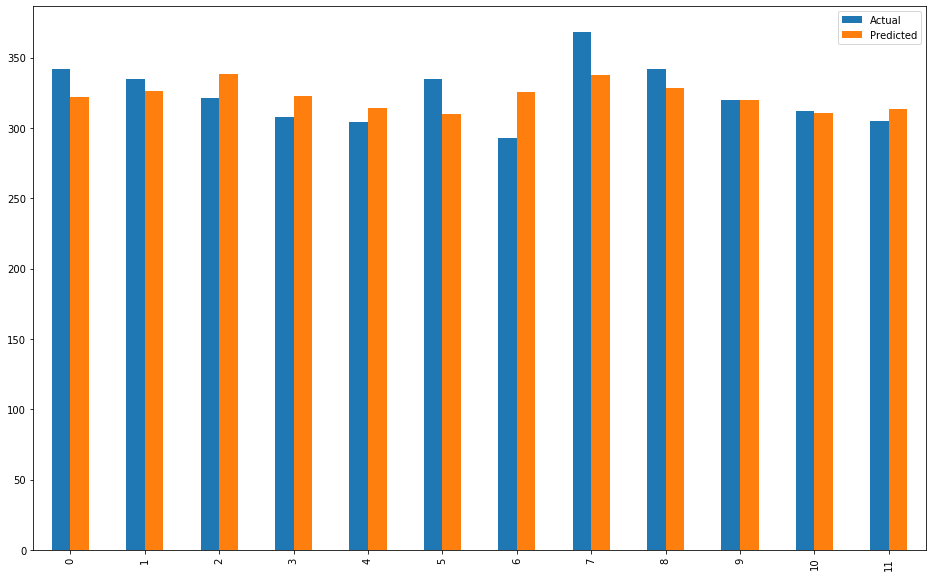

In [14]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
plot.scatter(x_test, y_test,  color='gray')
plot.plot(x_test, y_pred, color='red', linewidth=2)
plot.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [15]:
df["error"] = df["Actual"] - df["Predicted"]

In [16]:
df["error"]

0     20.211746
1      8.727424
2    -17.230769
3    -14.784770
4    -10.314384
5     25.169939
6    -32.774318
7     30.267489
8     13.236133
9      0.204778
10     1.173423
11    -8.816126
Name: error, dtype: float64

In [25]:
df["avg_error"] = sum(df["error"])/12

In [26]:
df["avg_error"]

0     1.25588
1     1.25588
2     1.25588
3     1.25588
4     1.25588
5     1.25588
6     1.25588
7     1.25588
8     1.25588
9     1.25588
10    1.25588
11    1.25588
Name: avg_error, dtype: float64

In [17]:
df["error_percent"] = df["error"]/df["Actual"]

In [18]:
df["error_percent"]

0     0.059099
1     0.026052
2    -0.053678
3    -0.048003
4    -0.033929
5     0.075134
6    -0.111858
7     0.082249
8     0.038702
9     0.000640
10    0.003761
11   -0.028905
Name: error_percent, dtype: float64

In [19]:
df["error_square"] = df["error_percent"]*df["error_percent"]

In [20]:
df["error_square"]

0     3.492653e-03
1     6.787073e-04
2     2.881372e-03
3     2.304240e-03
4     1.151170e-03
5     5.645140e-03
6     1.251215e-02
7     6.764834e-03
8     1.497856e-03
9     4.095119e-07
10    1.414489e-05
11    8.355181e-04
Name: error_square, dtype: float64

In [21]:
df["sum_square_error"] = sum(df["error_square"])

In [22]:
df["sum_square_error"]

0     0.037778
1     0.037778
2     0.037778
3     0.037778
4     0.037778
5     0.037778
6     0.037778
7     0.037778
8     0.037778
9     0.037778
10    0.037778
11    0.037778
Name: sum_square_error, dtype: float64

In [23]:
df["mean_square_error"] = df["sum_square_error"]/12

In [24]:
df["mean_square_error"]

0     0.003148
1     0.003148
2     0.003148
3     0.003148
4     0.003148
5     0.003148
6     0.003148
7     0.003148
8     0.003148
9     0.003148
10    0.003148
11    0.003148
Name: mean_square_error, dtype: float64

In [ ]:
#mean square error = 0.003148
#avg error = 1.25588